# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную по ссылке https://drive.google.com/file/d/1_2H5SJGM2TmBCs3b95aXHIH6R8ANd4ug/view?usp=sharing фотографию.

In [3]:
import numpy as np
from skimage.io import imread
from skimage.metrics import peak_signal_noise_ratio

img = imread(r'chain_small.jpg')
img = img.mean(axis=2)  # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

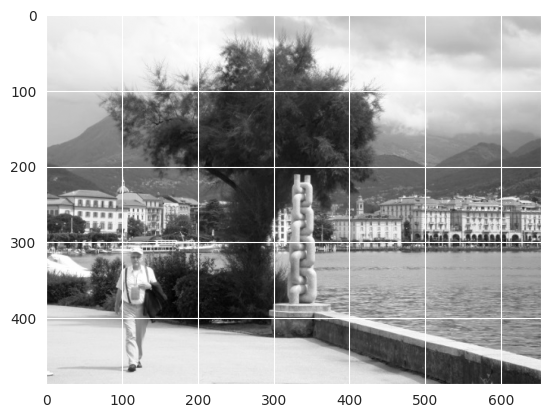

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [5]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)
print(f"U=", U, "\nS=", S, "\nVT=", VT)

U= [[ 0.06275315  0.03864384  0.00727887 ... -0.02676329 -0.10994667
  -0.05159008]
 [ 0.06274681  0.03894594  0.00677202 ...  0.14190103  0.26147019
  -0.01921875]
 [ 0.06273064  0.03925271  0.00616653 ... -0.34962387 -0.22175852
   0.11375177]
 ...
 [ 0.05279806  0.08763605 -0.03742521 ... -0.02640945 -0.01896768
  -0.04981175]
 [ 0.05259993  0.0851681  -0.0367499  ...  0.02872181  0.01299536
   0.05551945]
 [ 0.05245201  0.08392604 -0.03315691 ... -0.01724482 -0.00295846
  -0.0206969 ]] 
S= [8.97985806e+04 1.89564579e+04 1.16658813e+04 7.13788847e+03
 6.95607224e+03 5.68508009e+03 4.93633815e+03 4.55887205e+03
 3.85124233e+03 3.30613885e+03 3.17179381e+03 2.86882742e+03
 2.75958529e+03 2.50321495e+03 2.38571833e+03 2.26426788e+03
 1.91396543e+03 1.80157331e+03 1.76270285e+03 1.73434931e+03
 1.65792656e+03 1.57439626e+03 1.51158743e+03 1.45783349e+03
 1.42708389e+03 1.40515558e+03 1.36695861e+03 1.28609846e+03
 1.23873230e+03 1.23626376e+03 1.20092984e+03 1.15810927e+03
 1.14846327e+

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

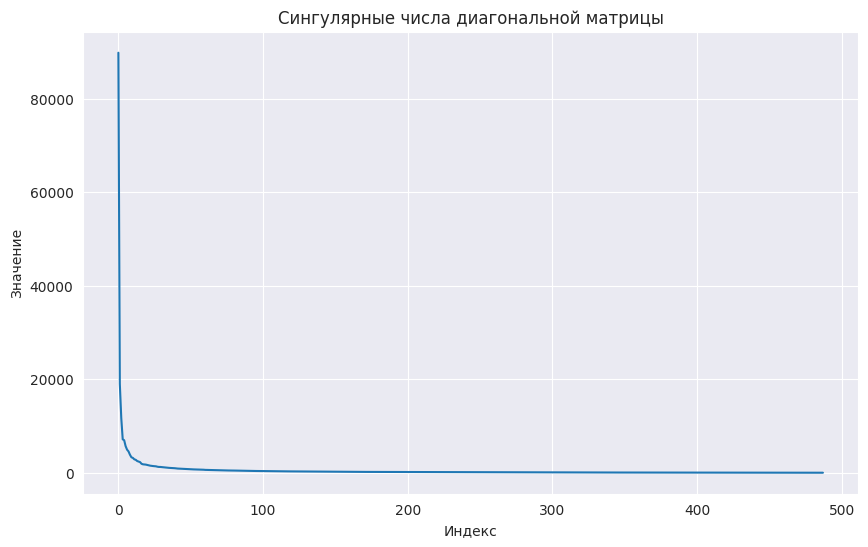

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(S)
plt.title('Сингулярные числа диагональной матрицы')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.3 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

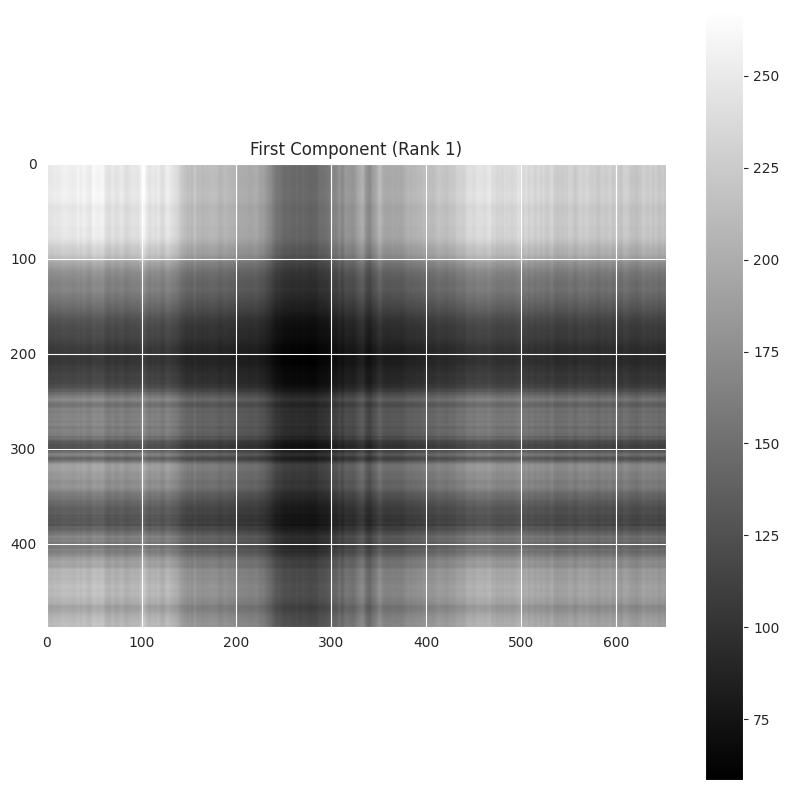

'\nНе ожидал, предполагал, что это будет нечто вроде силуэтов, но забегая вперед (по сути, начал анализировать после следующего задания) пришел к выводу, что это нечто вроде слоев.\n    Причем, не уверен, что точно подходит "слой", но кажется более лаконичным нежели "градиент серого" или "уровень яркости" или градиент цвета/яркости...\nПри наложении которых (через суммирование их компонент) друг на друга и образовывается силуэт.\nЭто конечно удивительно как цифры путем преобразований "превращаются" в изображение...\n\nСамая первая компонента "задает тон" или показывает общую структуру через оттенки серого/яркость/контраст (не знаю как уместно в данном случае..).\nДеталей не видно, но этот слой (первая компонента (сингулярное число)) является важным для последующего восстановления всей "картины".\n'

In [7]:
first_component = np.outer(U[:, 0], VT[0]) * S[0]
plt.figure(figsize=(10, 10))
plt.imshow(first_component, cmap='gray')
plt.title('First Component (Rank 1)')
plt.colorbar()
plt.show()

"""
Не ожидал, предполагал, что это будет нечто вроде силуэтов, но забегая вперед (по сути, начал анализировать после следующего задания) пришел к выводу, что это нечто вроде слоев.
    Причем, не уверен, что точно подходит "слой", но кажется более лаконичным нежели "градиент серого" или "уровень яркости" или градиент цвета/яркости...
При наложении которых (через суммирование их компонент) друг на друга и образовывается силуэт.
Это конечно удивительно как цифры путем преобразований "превращаются" в изображение...

Самая первая компонента "задает тон" или показывает общую структуру через оттенки серого/яркость/контраст (не знаю как уместно в данном случае..).
Деталей не видно, но этот слой (первая компонента (сингулярное число)) является важным для последующего восстановления всей "картины".
"""

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

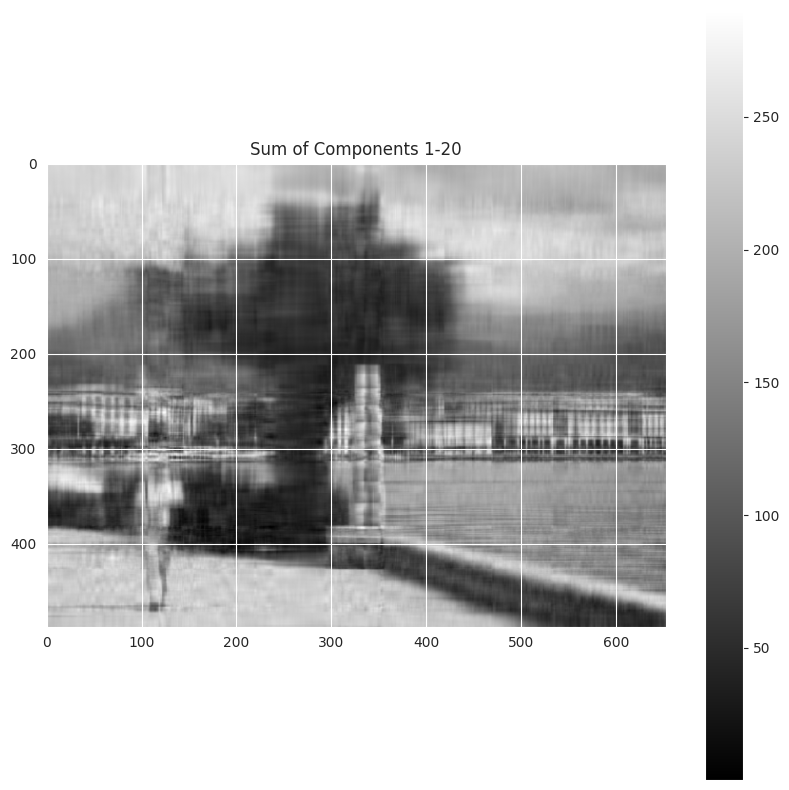

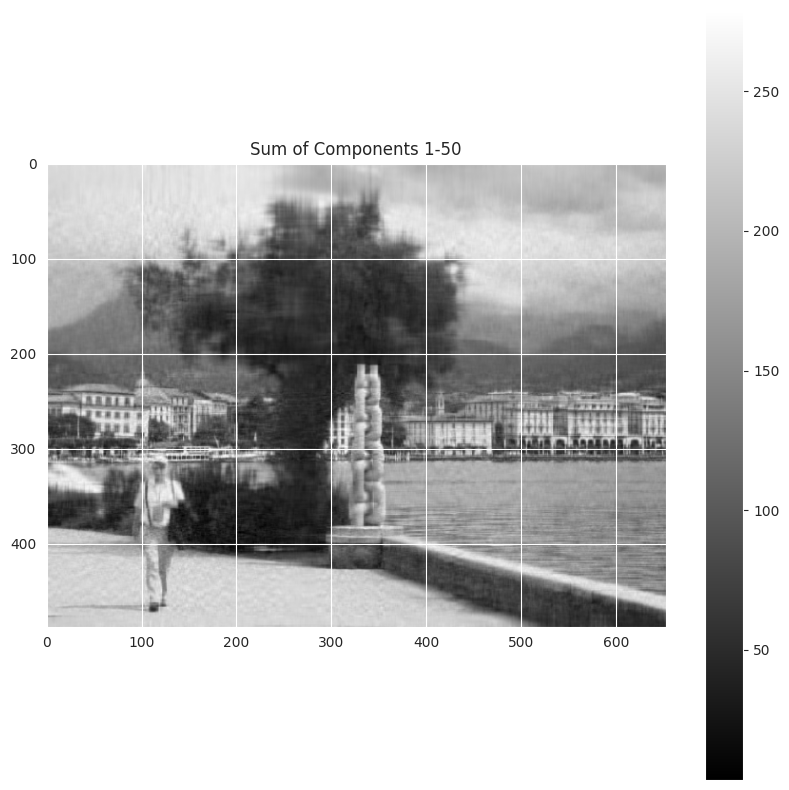

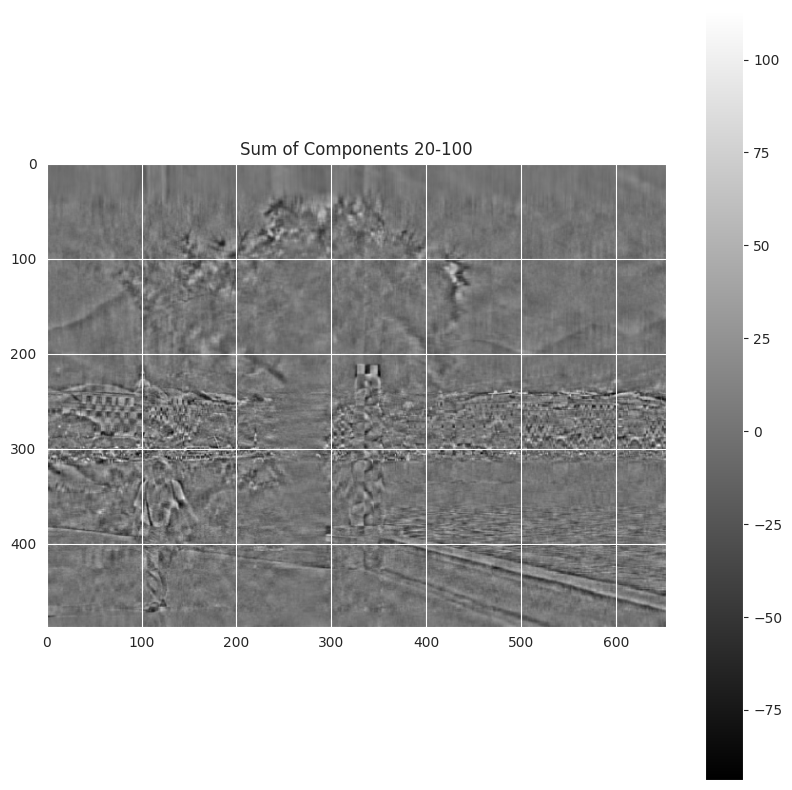

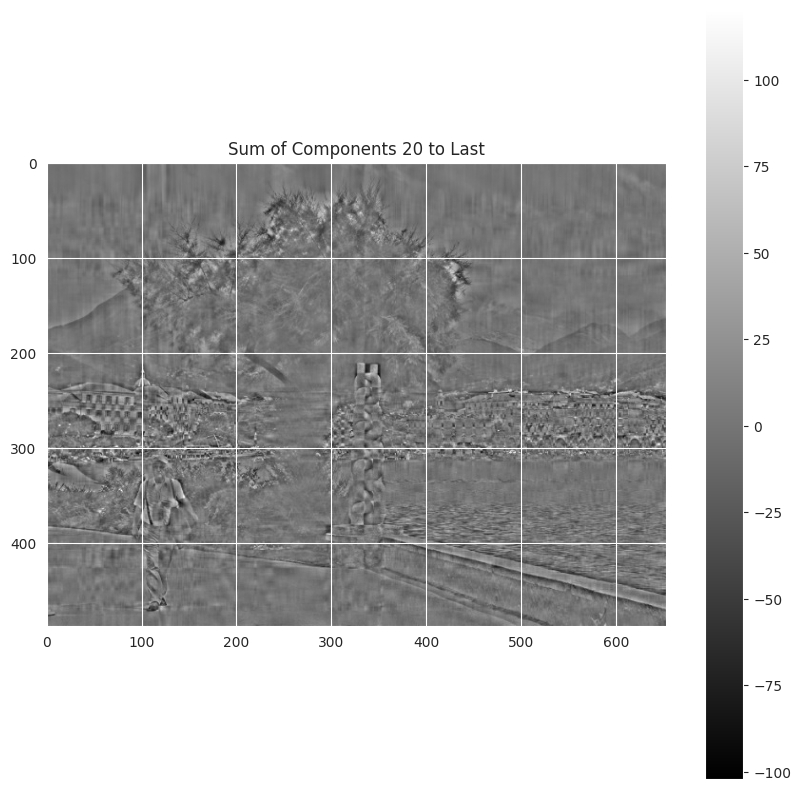

'\nОгромное значение имеет наличие первых компонент.\nПри их наличии можно проследить тенденцию изменения качества "восстановленного" изображения\n(по изменению суммы с первой компоненты с последующими до умеренного числа, отвечающего определенной цели).\n\nПо сумме первых 20 компонент можно различить основные черты изображения, увидеть силуэты с размытыми деталями, есть "шум".\nПо сумме первых 50 компонент изображение становится значительно более чётким с различимыми деталями и более уменьшенным "шумом".\nПо сумме компонент с 20 по 100, включительно, видны некоторые детали и силуэты, а детали/силуэты изображения менее очевидны.\nПо сумме компонент с 20 по последнею, как и в предыдущем случае, видна детализация, но разборчивее изображение не стало.\n\nВ общем, можно сделать вывод, n-первых компонент (сингулярных чисел диагональной матрицы) несут сведения об общей структуре\nизображения, а последующие наполняют деталями "общую картину" и убирают "шум".\n'

In [8]:
def plot_components(start, end, title):
    components_sum = np.sum([np.outer(U[:, i], VT[i]) * S[i] for i in range(start, end)], axis=0)
    plt.figure(figsize=(10, 10))
    plt.imshow(components_sum, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()


plot_components(0, 20, 'Sum of Components 1-20')
plot_components(0, 50, 'Sum of Components 1-50')
plot_components(20, 100, 'Sum of Components 20-100')
plot_components(20, U.shape[0], 'Sum of Components 20 to Last')
# plot_components(0, 5, 'Sum of Components 1-5')
# plot_components(0, 98, 'Sum of Components 1-98 ~20%')
# plot_components(0, 146, 'Sum of Components 1-146 ~30%')
# plot_components(0, 195, 'Sum of Components 1-195 ~40%')

"""
Огромное значение имеет наличие первых компонент.
При их наличии можно проследить тенденцию изменения качества "восстановленного" изображения
(по изменению суммы с первой компоненты с последующими до умеренного числа, отвечающего определенной цели).

По сумме первых 20 компонент можно различить основные черты изображения, увидеть силуэты с размытыми деталями, есть "шум".
По сумме первых 50 компонент изображение становится значительно более чётким с различимыми деталями и более уменьшенным "шумом".
По сумме компонент с 20 по 100, включительно, видны некоторые детали и силуэты, а детали/силуэты изображения менее очевидны.
По сумме компонент с 20 по последнею, как и в предыдущем случае, видна детализация, но разборчивее изображение не стало.

В общем, можно сделать вывод, n-первых компонент (сингулярных чисел диагональной матрицы) несут сведения об общей структуре
изображения, а последующие наполняют деталями "общую картину" и убирают "шум".
"""

**4. [0.5 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задание постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

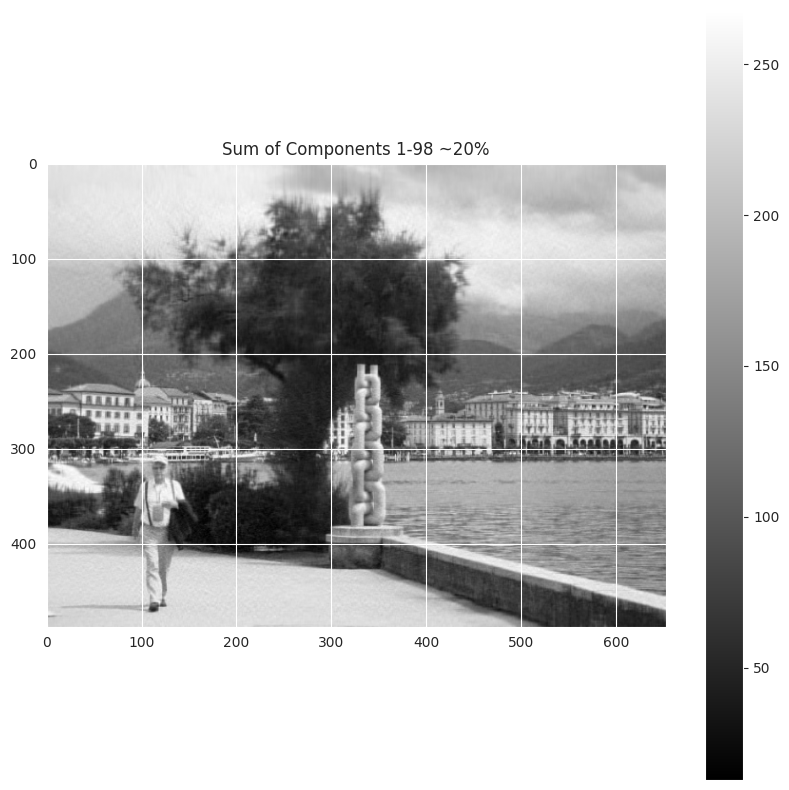

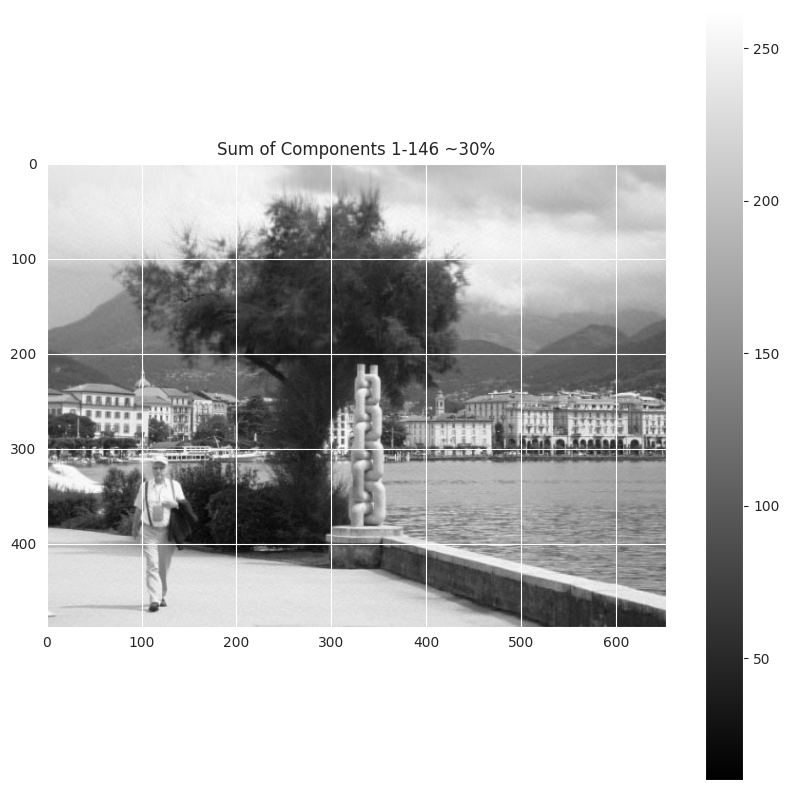

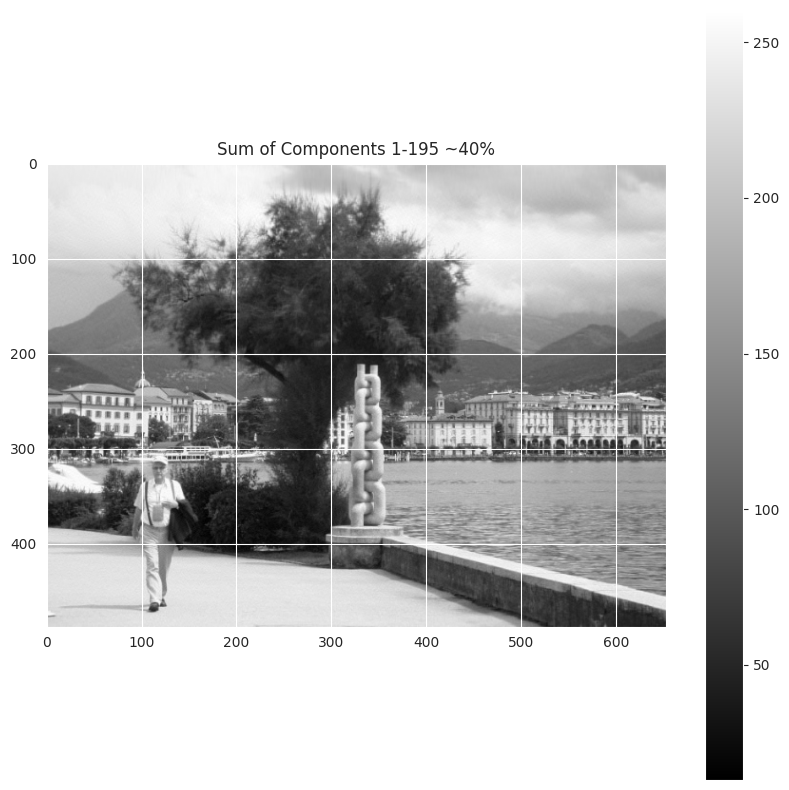

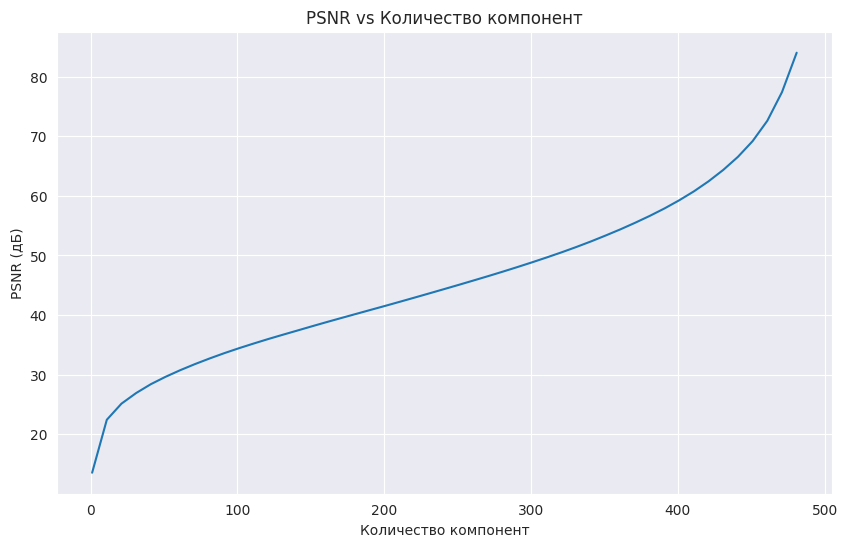

Для достижения PSNR > 35 дБ требуется 111 компонент


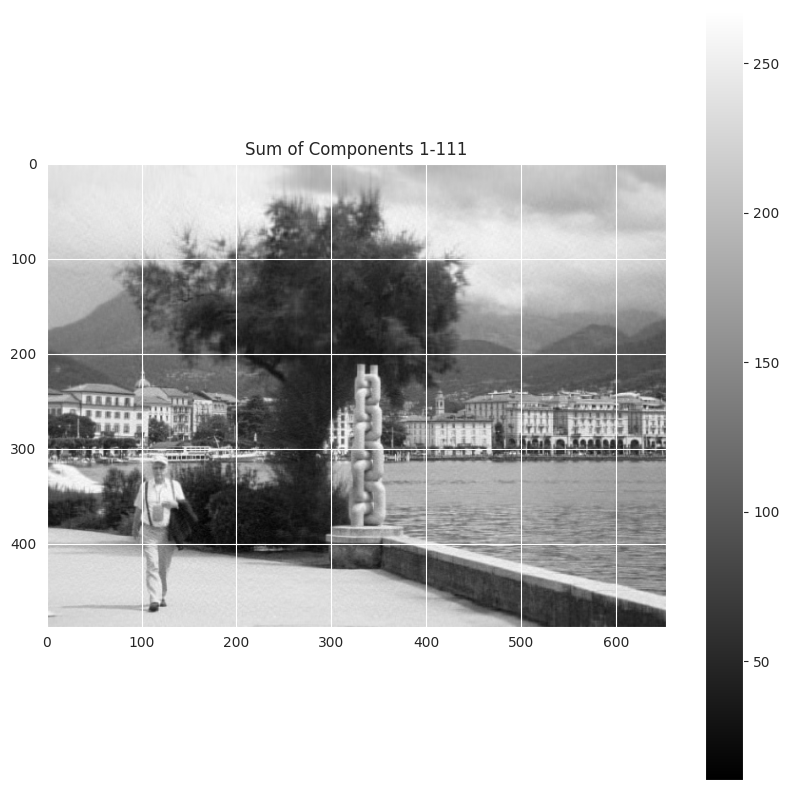

In [9]:
plot_components(0, 98, 'Sum of Components 1-98 ~20%')
plot_components(0, 146, 'Sum of Components 1-146 ~30%')
plot_components(0, 195, 'Sum of Components 1-195 ~40%')

"""
По сумме первых ~20% - уже видны детали и "шум" выражен в значительно меньшей мере.
По сумме первых ~30% - "на глаз" изображение очень близко к исходному, но виден "шум".
По сумме первых ~40% - "на глаз" изображение очень близко к исходному, "шум" едва заметен.
Субъективно, нужно анализировать сингулярные числа диагональной матрицы (лучше через график).
Либо, что есть объективно и общепринято, надо рассчитать количество компонент,
чтобы PSNR был больше 35 дБ. Что в свою очередь, даёт компромисс между качеством изображения
и количеством памяти/места, занимаемом на диске.
"""


# Расчет PSNR
def calculate_psnr(original, compressed):
    return peak_signal_noise_ratio(original, compressed, data_range=original.max() - original.min())


# Анализ зависимости PSNR и сингулярных значений диагональной матрицы
psnr_values = []
for i in range(1, len(S) + 1, 10):
    reconstructed = np.sum([np.outer(U[:, j], VT[j]) * S[j] for j in range(i)], axis=0)
    psnr = calculate_psnr(img, reconstructed)
    psnr_values.append((i, psnr))

plt.figure(figsize=(10, 6))
plt.plot(*zip(*psnr_values))
plt.title('PSNR vs Количество компонент')
plt.xlabel('Количество компонент')
plt.ylabel('PSNR (дБ)')
plt.grid(True)
plt.show()

# Расчет количества компонент, чтобы удовлетворить условию
threshold_psnr = 35
components_needed = next(i for i, psnr in psnr_values if psnr > threshold_psnr)

print(f"Для достижения PSNR > {threshold_psnr} дБ требуется {components_needed} компонент")

# И график с этим количеством суммы компонент
plot_components(0, components_needed, f'Sum of Components 1-{components_needed}')

**5. [0.35 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [10]:
i, j = img.shape
r = 111
mem_orig = i * j
mem_comp = r * (i + j + 1)
mem_ratio = mem_orig / mem_comp
print(
    f"В {mem_ratio:.2f} раз меньше (теоретически) потребуется для хранения нового изображения по сравнению с исходным")

В 2.51 раз меньше (теоретически) потребуется для хранения нового изображения по сравнению с исходным


**6. [0.35 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [11]:
mem_orig = img.nbytes
mem_comp = U[:, :r].nbytes + S[:r].nbytes + VT[:r, :].nbytes
mem_ratio = mem_orig / mem_comp
mem_profit = mem_orig - mem_comp
print(f"Исходная матрица занимает {mem_orig} байт")
print(f"Компоненты SVD занимают {mem_comp} байт")
print(
    f"Фактическая экономия памяти составит {mem_profit} байт, что в {mem_ratio:.2f} раз меньше по сравнению с исходным")

Исходная матрица занимает 2549312 байт
Компоненты SVD занимают 1014096 байт
Фактическая экономия памяти составит 1535216 байт, что в 2.51 раз меньше по сравнению с исходным


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ (специальная мера разброса) максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

In [12]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8, 8)))

0


**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [13]:
Ud, Sd, VTd = svd(digits.data, full_matrices=False)
print(f"Ud=", Ud, "\nSd=", Sd, "\nVTd=", VTd)

Ud= [[ 2.09114372e-02 -2.10250887e-03  3.89296445e-02 ...  0.00000000e+00
   0.00000000e+00 -9.92354046e-01]
 [ 2.53199533e-02  1.38656341e-02 -3.77989154e-02 ...  4.13498137e-02
  -3.79132573e-02 -2.89891431e-03]
 [ 2.54559261e-02  1.21951237e-02 -1.78272413e-02 ...  3.34304632e-03
  -1.88306995e-02 -2.06422290e-03]
 ...
 [ 2.98784403e-02  1.87985701e-02 -1.16134751e-02 ...  5.68394889e-03
  -6.78760992e-04 -1.02884326e-03]
 [ 2.67227437e-02 -8.66186959e-03  2.34742370e-02 ...  8.67959397e-04
   1.60943309e-03  3.65007231e-03]
 [ 2.93865591e-02 -8.03379300e-04  1.29922129e-02 ...  5.74615008e-04
  -3.60041049e-03 -4.73044250e-03]] 
Sd= [2.19311934e+03 5.66996772e+02 5.42004933e+02 5.04151698e+02
 4.25592965e+02 3.53218247e+02 3.20375836e+02 3.02074410e+02
 2.79556965e+02 2.68519447e+02 2.28655772e+02 2.24164792e+02
 2.07596162e+02 1.97012043e+02 1.85787554e+02 1.74752715e+02
 1.70848098e+02 1.65449993e+02 1.48269096e+02 1.44935033e+02
 1.39338512e+02 1.31353596e+02 1.28811234e+02 1.24

**6. [1 балл]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

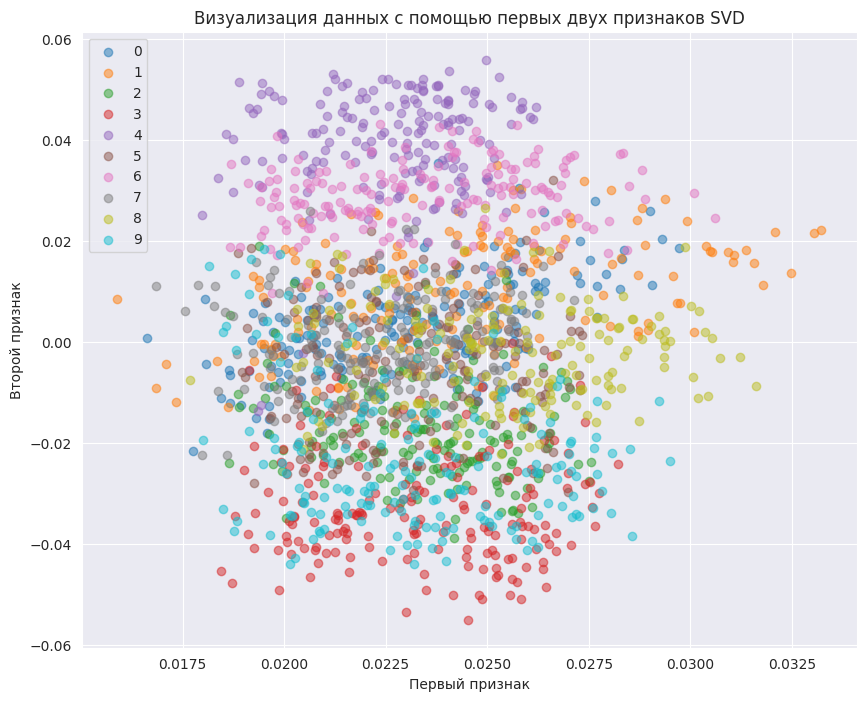

In [14]:
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(Ud[digits.target == i, 0], Ud[digits.target == i, 1], label=str(i), alpha=0.5)
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Визуализация данных с помощью первых двух признаков SVD')
plt.legend()
plt.show()

**7. [0.5 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

In [15]:
# Вычитание среднего значения из каждого признака
mean_centered_data = digits.data - digits.data.mean(axis=0)

# Применение SVD к центрированным данным
Ud_centered, Sd_centered, VTd_centered = svd(mean_centered_data, full_matrices=False)

# Визуализация центрированных данных на плоскости первых двух признаков
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(Ud_centered[digits.target == i, 0], Ud_centered[digits.target == i, 1], label=str(i), alpha=0.5)
plt.xlabel('Первый признак (центрированный)')
plt.ylabel('Второй признак (центрированный)')
plt.title('Визуализация центрированных данных с помощью первых двух признаков SVD')
plt.legend()
plt.show()

**8. [0.5 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

In [18]:
"""
Центрирование данных перед применением SVD позволяет лучше выявить различия между классами,
так как удаляется смещение/сдвиг, и данные становятся более симметричными относительно начала
координат. Это может привести к более четкому разделению классов на графике,
что облегчит их визуальную интерпретацию.
"""

'\nЦентрирование данных перед применением SVD позволяет лучше выявить различия между классами,\nтак как удаляется смещение/сдвиг, и данные становятся более симметричными относительно начала\nкоординат. Это может привести к более четкому разделению классов на графике,\nчто облегчит их визуальную интерпретацию.\n'

### Задание 3. Поиск похожих изображений с помощью SVD.

В этой задаче мы познакомимся с одним из возможных приложений сингулярного разложения — поиск "хорошего" базиса (eigenfaces) в наборе изображений и использования его для поиска похожих изображений.

**Замечание:** пользоваться циклами по изображениям **запрещено**, если это явно не прописано в условии.

Для этого сначала загрузим набор изображений, на котором будем обучаться. Это набор фотографий лиц, взятый с [сайта](http://vis-www.cs.umass.edu/lfw/) проекта "Labeled faces in the wild". Скачайте лица людей с именами, начинающимися на "А" и положите в папку `data/` в рабочей директории ноутбука.

Импортируем необходимые библиотеки и загрузим картинки в виде numpy-массивов.

In [61]:
import matplotlib.pyplot as plt
import PIL
import tarfile
import os
import numpy as np

In [62]:
def load_images(targz, size):
    images = {}
    tar = tarfile.open(targz, "r:gz")
    for tarinfo in tar:
        if tarinfo.isreg():
            file = tar.extractfile(tarinfo)
            image = PIL.Image.open(file)
            image = image.convert("L")
            image = image.resize(size, PIL.Image.LANCZOS)
            image = np.asarray(image, dtype=np.double)
            image /= np.linalg.norm(image)
            parts = os.path.normpath(tarinfo.name).split(os.path.sep)
            images.setdefault(parts[-2], []).append(image)
    return images

In [63]:
size = 256
images = load_images("data/lfw-a.tgz", (size, size))

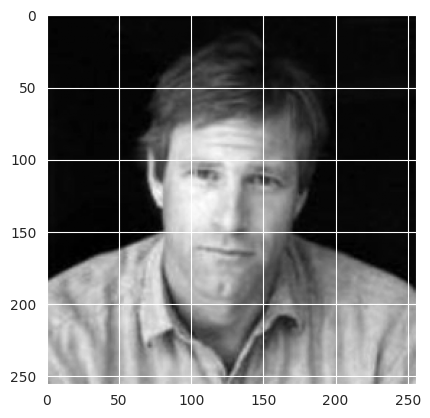

In [64]:
_ = plt.imshow(images["Aaron_Eckhart"][0], cmap="gray")

Сразу отложим одно изображение для последующего поиска.

In [65]:
test_image = images["Alejandro_Toledo"][10]
del images["Alejandro_Toledo"][10]

#### a. Применение базового алгоритма SVD

1. **(0.5 балла)** С помощью функции ```np.reshape(...)``` получите из словаря `images` массив ```M``` размера ```(size * size, nframes)```, каждым столбцом которого является изображение размера ```(size, size)```, представленное в виде вектора длины ```size**2``` (используйте такое значение параметра `order`, чтобы обходить картинки по столбцам).

*В этом пункте (и только в этом) можно использовать цикл по изображениям.*

In [66]:
M = np.column_stack([image.ravel(order='F') for person_images in images.values() for image in person_images])
M.shape

(65536, 1053)

2. **(0.6 баллов)** Вычислите сингулярное разложение матрицы ```M``` с помощью ```np.linalg.svd``` и постройте график сингулярных чисел, отсортированных по убыванию. Шкала с сингулярными числами должна быть логарифмической. Например, для этого можно использовать функцию ```plt.semilogy```.

    **Замечание:** При построении графиков величин с отличающимися на порядки значениями полезно использовать логарифмическую шкалу. Чтобы убедиться в этом, попробуйте построить график не в логарифмической шкале; из него будет фактически невозможно понять характер убывания сингулярных чисел.

In [67]:
# Шаг 2: Вычисление SVD и построение графика сингулярных чисел
Uf, Sf, VTf = np.linalg.svd(M, full_matrices=False)
plt.semilogy(Sf)
plt.title('Сингулярные числа матрицы M')
plt.xlabel('Индекс')
plt.ylabel('Сингулярное число (логарифмическая шкала)')
plt.show()

 3. **(0.5 баллов)** Заполните пропуск в следующей функции, которая должна визуализировать вектор-столбцы нашей матрицы в виде таблицы. Затем с её помощью визуализируйте несколько первых сингулярных векторов. Опишите неформально, за что отвечают три старших сингулярных вектора.

In [68]:
def plot_as_images(mat, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    for i in range(rows):
        for j in range(cols):
            axes[i, j].imshow(mat[:, i * cols + j].reshape((size, size), order='F'), cmap="gray")
            axes[i, j].get_xaxis().set_visible(False)
            axes[i, j].get_yaxis().set_visible(False)

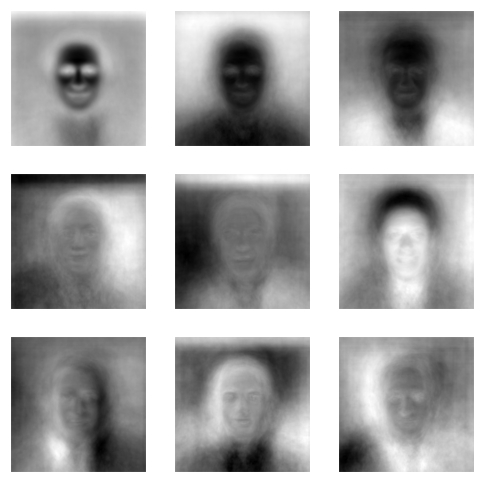

In [69]:
plot_as_images(Uf, 3, 3)  # Визуализация первых 9 сингулярных векторов

In [70]:
"""
В: Опишите неформально, за что отвечают три старших сингулярных вектора

О: Три старших сингулярных вектора позволяют понять основные типы объектов и их взаимосвязи.
1. Тип/признак/атрибут какого-либо объекта, который наиболее часто встречается и отражает общую структуру объектов.
    Он помогает определить основной класс или группу объектов.
2. Тип объекта, который часто вместе с первым встречается.
    Если известно о первом, то второй может быть предсказан и отражает связь между ними.
3. Тип объекта, который тоже часто встречается, но менее часто, чем первые два.
    Он помогает учесть дополнительные характеристики или связи в объектах.
"""

'\nВ: Опишите неформально, за что отвечают три старших сингулярных вектора\n\nО: Три старших сингулярных вектора позволяют понять основные типы объектов и их взаимосвязи.\n1. Тип/признак/атрибут какого-либо объекта, который наиболее часто встречается и отражает общую структуру объектов.\n    Он помогает определить основной класс или группу объектов.\n2. Тип объекта, который часто вместе с первым встречается.\n    Если известно о первом, то второй может быть предсказан и отражает связь между ними.\n3. Тип объекта, который тоже часто встречается, но менее часто, чем первые два.\n    Он помогает учесть дополнительные характеристики или связи в объектах.\n'

4. **(0.6 балла)** Напишите функцию-обёртку ```trunc_svd(M, r)```, которая повторяет вычисление svd из пункта 2, а потом вычисляет для матрицы $M$ оптимальное приближение $M_{r}$ заданного ранга. Функция должна возвращать матрицы $U$ и $C$ такие, что столбцы матрицы $U$ составляют ортонормированный базис столбцов $M_{r}$, а $UC = M_{r}$. Также функция `trunc_svd` возвращает **относительную** точность приближения во Фробениусовой норме, т.е.
$$
    \frac{\|M - M_{r}\|_F}{\|M\|_F}.
$$

In [71]:
def trunc_svd(M, r):
    U, S, VT = np.linalg.svd(M, full_matrices=False)
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]
    Mr = Ur @ Sr @ VTr
    rel_eps = np.linalg.norm(M - Mr, 'fro') / np.linalg.norm(M, 'fro')
    return Ur, Sr @ VTr, rel_eps

5. **(0.6 баллов)** Проверим работу написанной функции. Для этого воспользуемся функцией, которая рисует исходное изображение, приближение некоторого ранга, а также первые `count` сингулярных векторов в разложении вместе с их коэффициентами. Заполните пропуски в ней с помощью метода `reshape`.

In [72]:
def plot_as_combination(M, U, C, count, indices):
    fig, all_axes = plt.subplots(len(indices), count + 2, figsize=(count * 2, len(indices) * 2))

    for i, index in enumerate(indices):
        axes = all_axes[i, :]

        axes[0].imshow(M[:, index].reshape(size, size, order='F'), cmap="gray")  # Original image
        axes[0].set_xlabel("Orig")

        appr = U @ C[:, index]
        axes[1].imshow(appr.reshape((size, size), order='F'), cmap="gray")  # Approximation image
        axes[1].set_xlabel("Appr")

        for j in range(count):
            axes[2 + j].imshow(U[:, j].reshape((size, size), order='F'), cmap="gray")  # i-th singular vector image
            axes[2 + j].set_xlabel("{:.7}".format(C[j, index]))

        for ax in axes:
            ax.set_xticks([])
            ax.get_yaxis().set_visible(False)

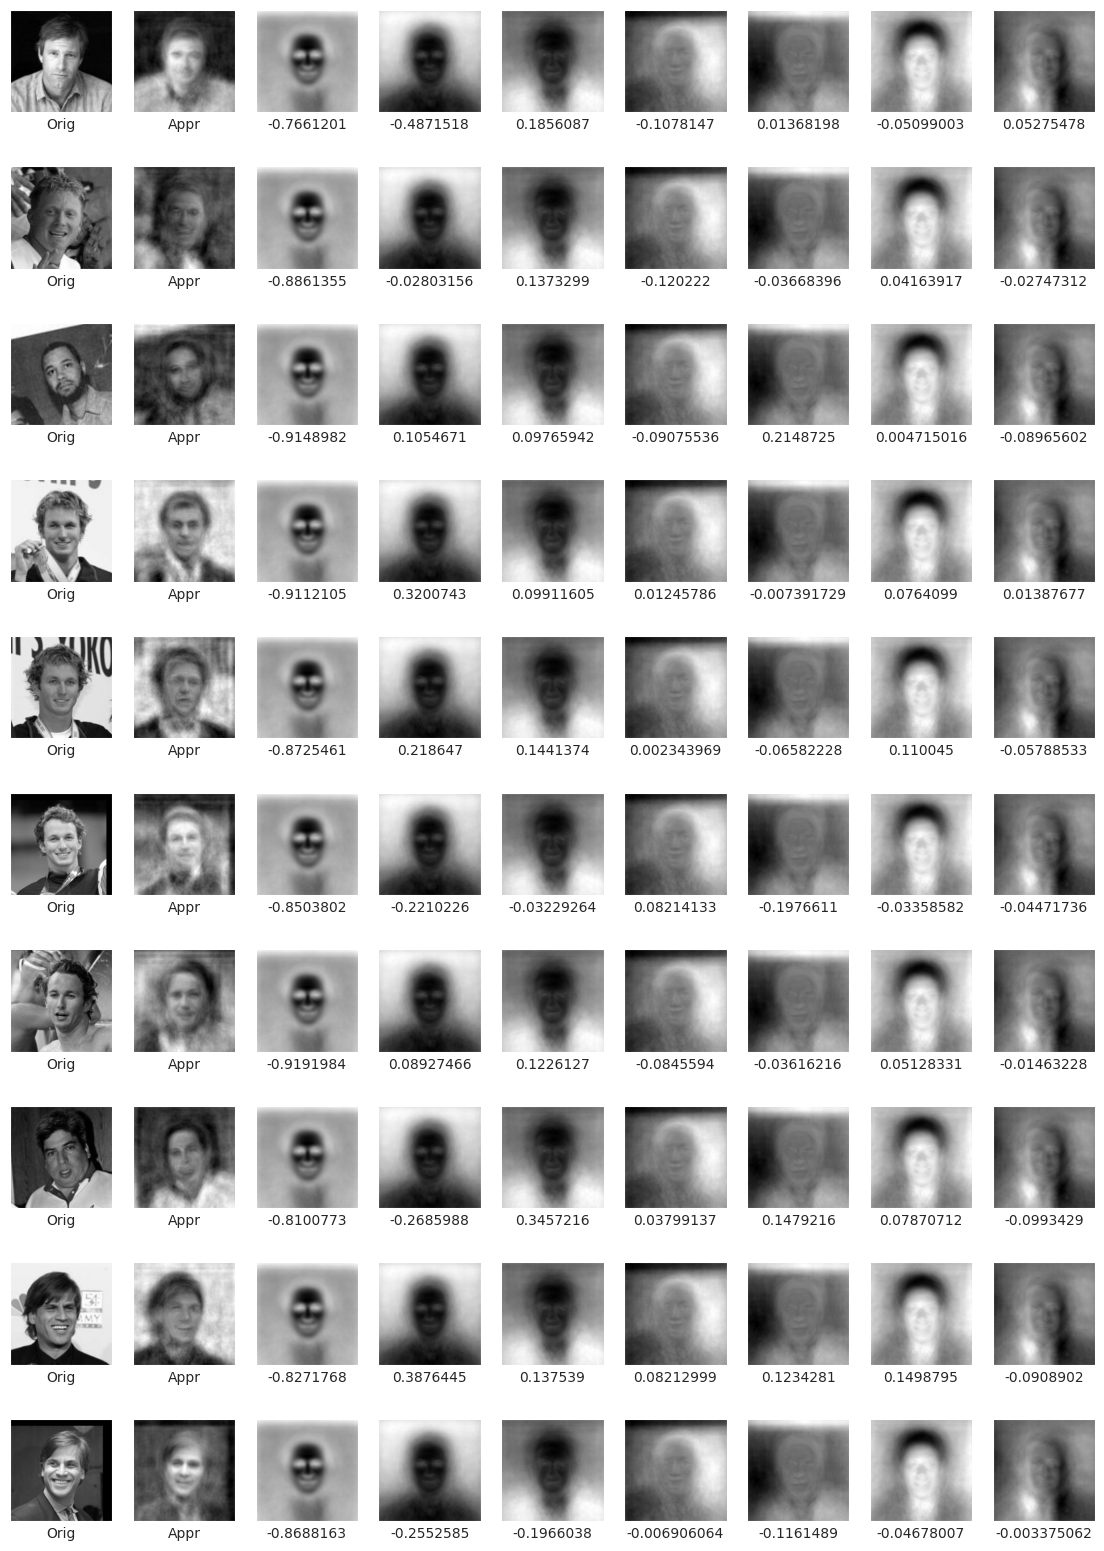

In [73]:
U, C, eps = trunc_svd(M, 100)
plot_as_combination(M, U, C, 7, range(10))

#### b. Поиск нового изображения

Представьте, что нам выдали новое изображение `new`, которого в нашей базе нет. Чтобы найти в базе похожие, можно посчитать норму разности с каждым имеющимся изображением. Для проверки напишем вспомогательную функцию, которая будет показывать подписанные картинки.

In [74]:
def show_images(M, indices, names):
    fig, axes = plt.subplots(1, len(indices), figsize=(len(indices) * 3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(M[:, index].reshape((size, size), order="F"), cmap="gray")
        ax.get_xaxis().set_ticks([])
        ax.set_xlabel(names[index])
        ax.get_yaxis().set_visible(False)

   1. **(1 балл)** Напишите функцию, находящее ближайшее во фробениусовой норме изображение.

In [75]:
def get_closest_naive(M, new_v, count):
    distances = np.linalg.norm(M - new_v[:, np.newaxis], axis=0)
    return np.argsort(distances)[:count]

Проверим её на тестовом изображении. Как минимум один Алехандро Толедо должен найтись.

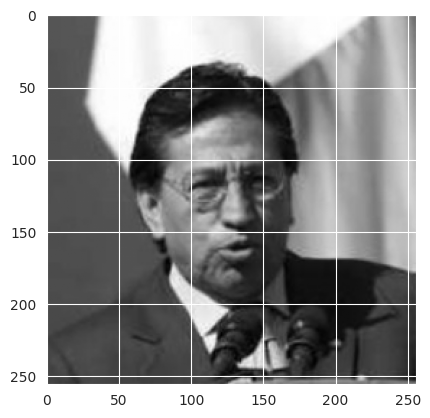

In [76]:
new = test_image
_ = plt.imshow(new, cmap="gray")

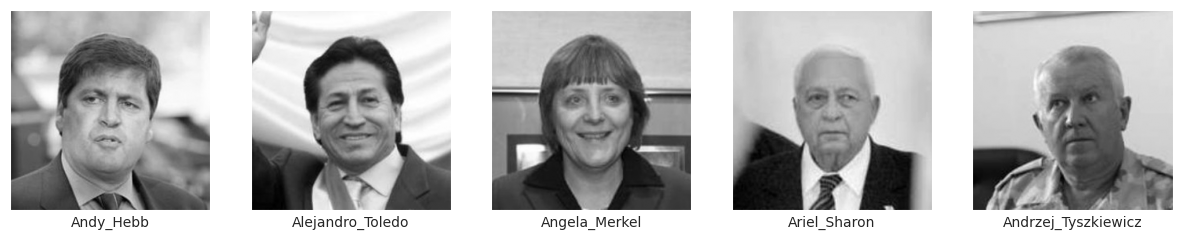

In [77]:
new_v = new.ravel(order="F")
names = sum(map(lambda item: [item[0]] * len(item[1]), images.items()), [])
show_images(M, get_closest_naive(M, new_v, 5), names)

Помимо того, что такой подход может оказаться неприемлемым с точки зрения производительности, он также не устойчив:  например, изменение освещения или фона может очень сильно изменить норму разности.

   2. **(2 балла)** Применим подход, использующий SVD. Именно, спроецируем новое изображение на пространство, задаваемое ортонормированным базисом $U$, и будем сравнивать норму разности проекций. Причём для устойчивости к изменению освещения не будем учитывать первую компоненту в разложении по столбцам матрицы $U$. Напишите функцию `get_closest_proj`, которая возвращает индексы `count` изображений по описанному алгоритму.

In [78]:
def get_closest_proj(U, C, new_v, count):
    proj_new = U.T @ new_v
    proj_new[0] = 0  # Игнорируем первый компонент для инвариантности к освещению
    distances = np.linalg.norm(C[1:] - proj_new[1:, np.newaxis], axis=0)
    return np.argsort(distances)[:count]

Проверим подход с SVD  том же тестовом изображении. Правильно реализованный метод должен найти как минимум два изображения Алехандро.

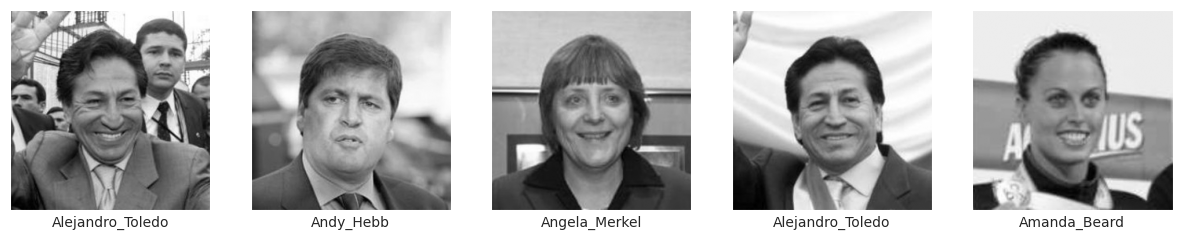

In [79]:
show_images(M, get_closest_proj(U, C, new_v, 5), names)